In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

# Nodes assignment

Calculate the degree of each node Mom: 1 You: 4 Aunt Alice: 2 Fiancee: 4 Dave: 3 Brian: 3 Write a list of edges {Mom, You} {You, Aunt Alice} {You, Fiancee} {You, Dave} {You, Brian} {Fiancee, Dave {Fiancee, Brian} {Dave, Brian} Calculate the clustering coefficient for each node: You: 8/20 Mom: NA (only links to one node) Aunt Alice: 1 Fiancee: 8/12 Dave: 1 Brian: 1 Calculate the shortest paths between each pair of nodes: You,Fiancee: 1 You, Mom: 1 You, Aunt Alice: 1 You, Dave: 1 You, Brian: 1 Fiancee, Aunt Alice: 1 Fiancee, Mom: 2 (Fiancee, You, Mom) Fiancee, Dave: 1 Fiancee, Brian: 1 Aunt Alice, Mom: 2 (Aunt Alice, You, Mom) Aunt Alice, Dave: 2 (Aunt Alice, You, Dave) (Aunt Alice, Fiancee, Dave) Aunt Alice, Brian: 2 (Aunt Alice, You, Brian) (Aunt Alice, Fiancee, Brian) Mom, Dave: 2 (Mom, You, Dave) Mom, Brian: 2 (Mom, You, Brian) Dave, Brian: 1 Calculate the betweenness centrality of each node: You: 6/12 Fiancee: 2/12 Mom: 0/12 Aunt Alice: 0/10 Dave: 0/11 Brian: 0/11 Find a walk of length 5 linking Fiancee to You {Fiancee, Dave, Brian, Dave, You} or {Fiancee, You, Aunt Alice, Fiancee, You} {Fiancee, Brian, Dave, Brian, You} {Fiancee, Brian, You, Aunt Alice, You} etc Find the shortest path linking Dave to Mom. {Dave, You, Mom} How long is a cycle linking You to Aunt Alice? 3 {You, Fiancee, Aunt Alice, You}


Original Graph

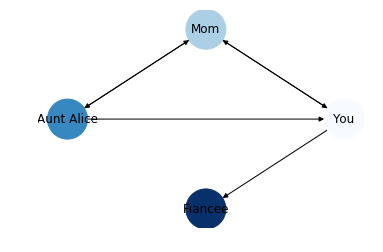

In [2]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Aunt Alice')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()


Graph with updated nodes and connections. 

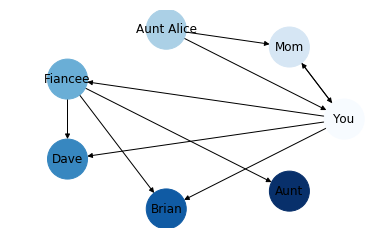

In [12]:
import networkx as nx

#Creating a directed graph
G = nx.DiGraph()
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Aunt Alice')
G.add_node('Fiancee')
G.add_node('Dave')
G.add_node('Brian')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You')])
G.add_edges_from([('Aunt Alice','Mom'),('Aunt Alice','You')])
G.add_edges_from([('Fiancee','Aunt'),('Fiancee','Dave'),('Fiancee','Brian')])
G.add_edges_from([('You','Dave'),('You','Brian')])

#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.circular_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

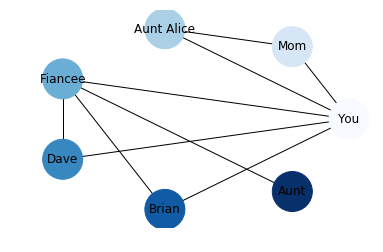

This graph has 7 nodes and 9 edges.
The "Mom" node has a degree of 2.
The "You" node has a degree of 5.
The "Aunt Alice" node has a degree of 2.
The "Fiancee" node has a degree of 4.
The "Dave" node has a degree of 2.
The "Brian" node has a degree of 2.
The shortest path between "You" and "Fiancee" is ['You', 'Fiancee'].
The shortest path between "You" and "Mom" is ['You', 'Mom'].
The shortest path between "You" and "Aunt Alice" is ['You', 'Aunt Alice'].
The shortest path between "You" and "Dave" is ['You', 'Dave'].
The shortest path between "You" and "Brian" is ['You', 'Brian'].
The shortest path between "Fiancee" and "Aunt Alice" is ['Fiancee', 'You', 'Aunt Alice'].
The shortest path between "Fiancee" and "Mom" is ['Fiancee', 'You', 'Mom'].
The shortest path between "Fiancee" and "Dave" is ['Fiancee', 'Dave'].
The shortest path between "Fiancee" and "Brian" is ['Fiancee', 'Brian'].
The shortest path between "Fiancee" and "Mom" is ['Fiancee', 'You', 'Mom'].
The shortest path between "

In [22]:
from networkx.algorithms.shortest_paths.generic import shortest_path

# Converting to an undirected graph
UG=G.to_undirected()

#Drawing the new graph
nx.draw_networkx(UG,
                 pos=nx.circular_layout(UG), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis('off')
plt.show()

print("This graph has {} nodes and {} edges.".format(UG.number_of_nodes(),UG.number_of_edges()))
print('The "Mom" node has a degree of {}.'.format(UG.degree('Mom')))
print('The "You" node has a degree of {}.'.format(UG.degree('You')))
print('The "Aunt Alice" node has a degree of {}.'.format(UG.degree('Aunt Alice')))
print('The "Fiancee" node has a degree of {}.'.format(UG.degree('Fiancee')))
print('The "Dave" node has a degree of {}.'.format(UG.degree('Dave')))
print('The "Brian" node has a degree of {}.'.format(UG.degree('Brian')))

print('The shortest path between "You" and "Fiancee" is {}.'.format(shortest_path(UG, source='You', target='Fiancee')))
print('The shortest path between "You" and "Mom" is {}.'.format(shortest_path(UG, source='You', target='Mom')))
print('The shortest path between "You" and "Aunt Alice" is {}.'.format(shortest_path(UG, source='You', target='Aunt Alice')))
print('The shortest path between "You" and "Dave" is {}.'.format(shortest_path(UG, source='You', target='Dave')))
print('The shortest path between "You" and "Brian" is {}.'.format(shortest_path(UG, source='You', target='Brian')))
print('The shortest path between "Fiancee" and "Aunt Alice" is {}.'.format(shortest_path(UG, source='Fiancee', target='Aunt Alice')))
print('The shortest path between "Fiancee" and "Mom" is {}.'.format(shortest_path(UG, source='Fiancee', target='Mom')))
print('The shortest path between "Fiancee" and "Dave" is {}.'.format(shortest_path(UG, source='Fiancee', target='Dave')))
print('The shortest path between "Fiancee" and "Brian" is {}.'.format(shortest_path(UG, source='Fiancee', target='Brian')))
print('The shortest path between "Fiancee" and "Mom" is {}.'.format(shortest_path(UG, source='Fiancee', target='Mom')))
print('The shortest path between "Aunt Alice" and "Mom" is {}.'.format(shortest_path(UG, source='Aunt Alice', target='Mom')))
print('The shortest path between "Aunt Alice" and "Dave" is {}.'.format(shortest_path(UG, source='Aunt Alice', target='Dave')))
print('The shortest path between "Aunt Alice" and "Brian" is {}.'.format(shortest_path(UG, source='Aunt Alice', target='Brian')))
print('The shortest path between "Mom" and "Dave" is {}.'.format(shortest_path(UG, source='Mom', target='Dave')))
print('The shortest path between "Mom" and "Brian" is {}.'.format(shortest_path(UG, source='Brian', target='Mom')))
print('The shortest path between "Brian" and "Dave" is {}.'.format(shortest_path(UG, source='Brian', target='Dave')))
print("The betweenness centrality scores are {}".format(nx.betweenness_centrality(UG)))
print('5 length path between You and Fiancee would be {Fiancee, Dave, Brian, Dave, You}')
print('Cycle length between You and Aunt Alice would be 3')